#  EDUNET FOUNDATION-Class Exercise Notebook

# Lab 27 - Implementing CNN Classifier 


## Task: Create a CNN classfier 

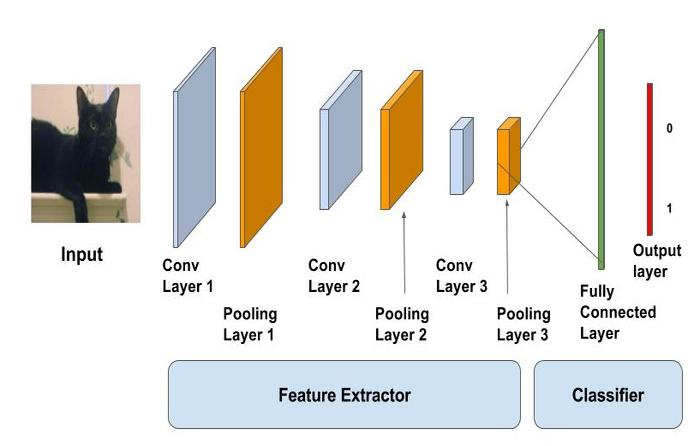

A convolutional neural network, or CNN for short, is a type of classifier, which excels at solving this problem!

A CNN is a neural network: an algorithm used to recognize patterns in data. Neural Networks in general are composed of a collection of neurons that are organized in layers, each with their own learnable weights and biases. 

## Following experiment has been performed using the following dataset
https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset

Importing necessary libraries

In [5]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Importing dataset and converting images into parsable uniform size

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# Data Augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('catdog/train',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('catdog/test',
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 4393 images belonging to 2 classes.
Found 2241 images belonging to 2 classes.


Creating a 2D CNN classifier

In [7]:
#Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64,64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(64, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the model

In [8]:
history=classifier.fit(training_set,# the training set
                         epochs = 5,# number of epochs 
                         validation_data = test_set# the test set
                         )

Epoch 1/5
138/138 [==============================] - 58s 417ms/step - loss: 0.4790 - accuracy: 0.8229 - val_loss: 0.4210 - val_accuracy: 0.8496
Epoch 2/5
138/138 [==============================] - 40s 292ms/step - loss: 0.4578 - accuracy: 0.8275 - val_loss: 0.4130 - val_accuracy: 0.8496
Epoch 3/5
138/138 [==============================] - 37s 270ms/step - loss: 0.4548 - accuracy: 0.8275 - val_loss: 0.4146 - val_accuracy: 0.8496
Epoch 4/5
138/138 [==============================] - 37s 271ms/step - loss: 0.4506 - accuracy: 0.8275 - val_loss: 0.4102 - val_accuracy: 0.8496
Epoch 5/5
138/138 [==============================] - 37s 271ms/step - loss: 0.4498 - accuracy: 0.8275 - val_loss: 0.4089 - val_accuracy: 0.8496


Plotting the final results

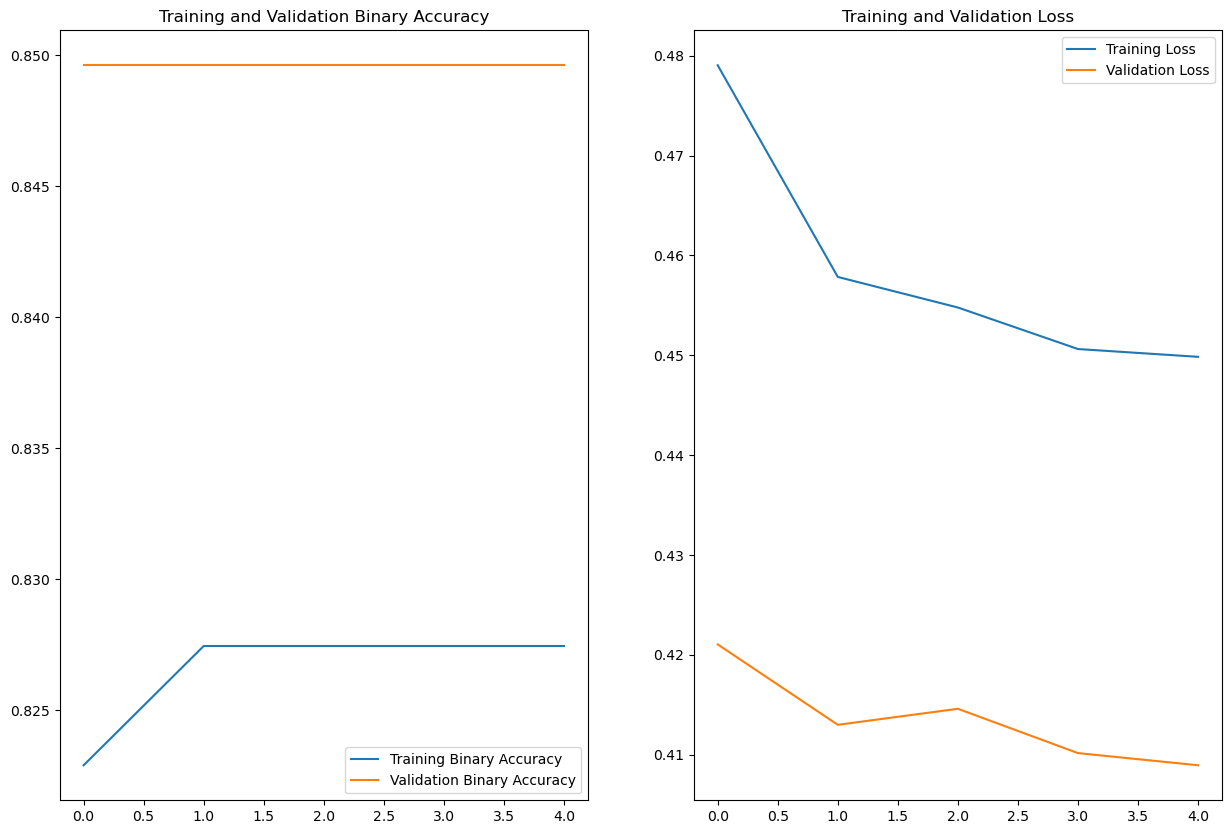

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(history.history['val_loss']))
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Binary Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Binary Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Binary Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()